# Preparing the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
df = pd.read_csv("Unemployment in India.csv")

# Data Exploration

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [8]:
df[' Date'].value_counts()

 Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name: count, dtype: int64

In [9]:
df[' Frequency'].value_counts()

 Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [10]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

# Data Cleaning

In [11]:
df1=df.dropna()

In [12]:
# As the whole data is recorded monthly, the frequency month can be considered redundant data. So it will be dropped
df1=df.drop(columns=[' Frequency'])
df1.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


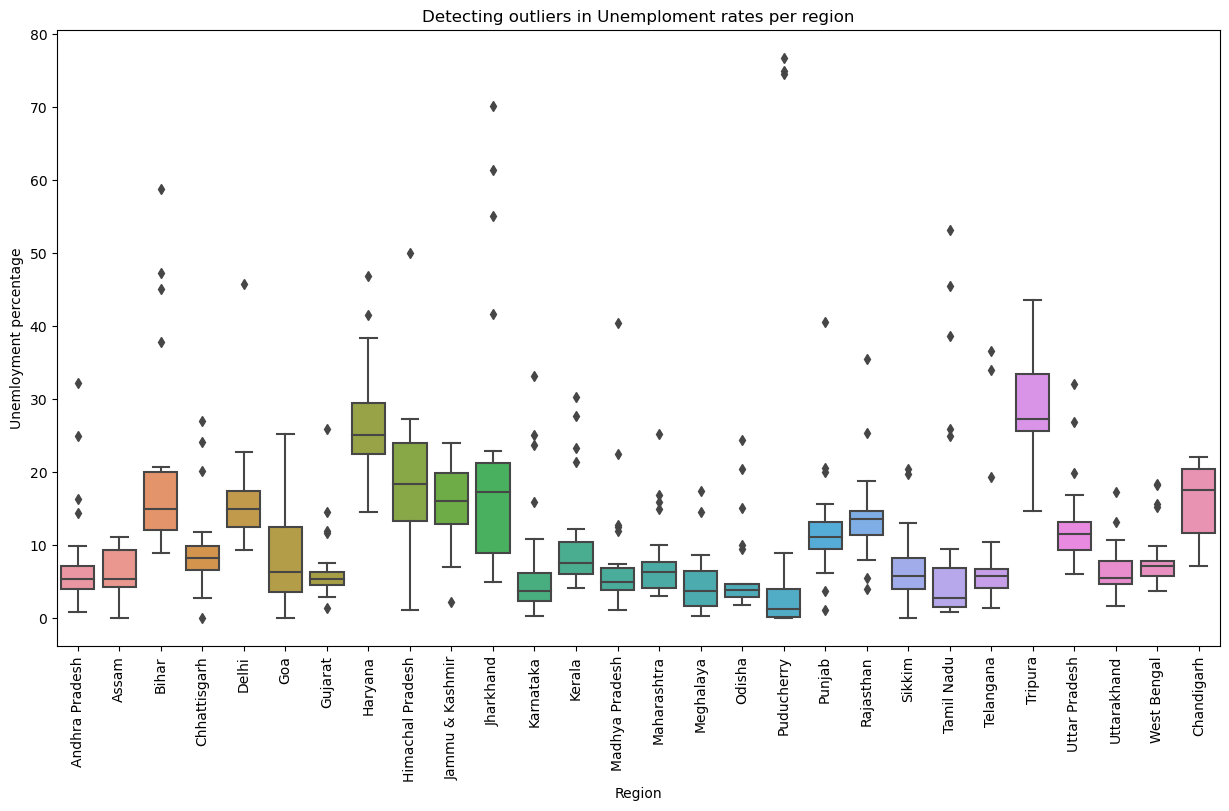

In [13]:
#Searching for outliers
plt.figure(figsize=(15,8))
sns.boxplot(data= df1, x='Region', y=' Estimated Unemployment Rate (%)')
plt.title('Detecting outliers in Unemploment rates per region')
plt.ylabel('Unemloyment percentage')
plt.xticks(rotation = 90)
plt.show()

# Data Visualization

Let's see the change in percentage of particiation rate per month and see if we can get another insights

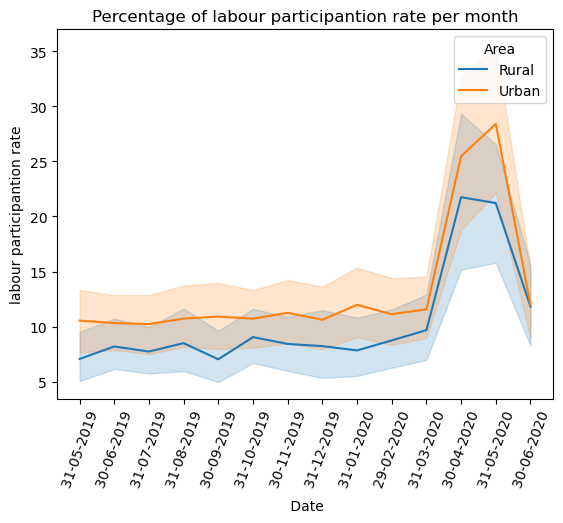

In [14]:
sns.lineplot(data=df1, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Area')
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('labour participantion rate')
plt.xticks(rotation= 70)
plt.show()

Discovering the differences in unemployment percentages among regions should tell us the most affected region of the Covid-19 crisis.

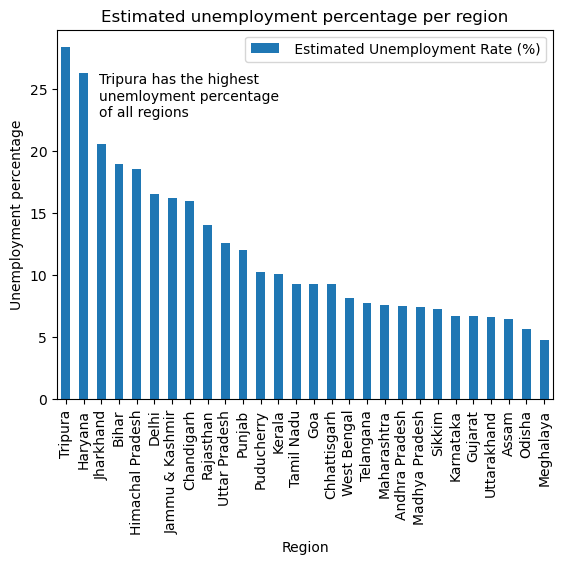

In [15]:
df2 = df1.groupby('Region')[[' Estimated Unemployment Rate (%)']].mean().sort_values(by=' Estimated Unemployment Rate (%)',ascending= False)
df2.plot(kind='bar')
plt.title('Estimated unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.figtext(x= 0.19, y= 0.7, s= 'Tripura has the highest\nunemloyment percentage\nof all regions')
plt.show()

The average employed per region will tell us if there a significant difference in employees among states as well as the regions with the highest and lowest number of employees

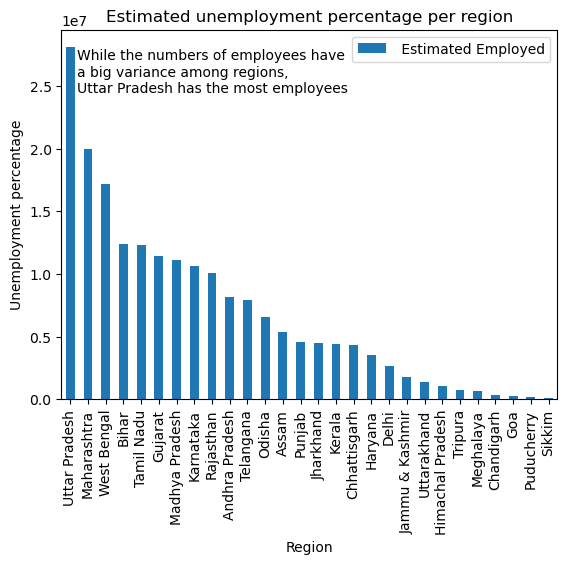

In [16]:
df3 = df1.groupby('Region')[[' Estimated Employed']].mean().sort_values(by=' Estimated Employed',ascending= False)
df3.plot(kind='bar')
plt.title('Estimated unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.figtext(x=0.15, y=0.75, s='While the numbers of employees have\na big variance among regions,\nUttar Pradesh has the most employees')
plt.show()

Which area has a lower unemployment rate

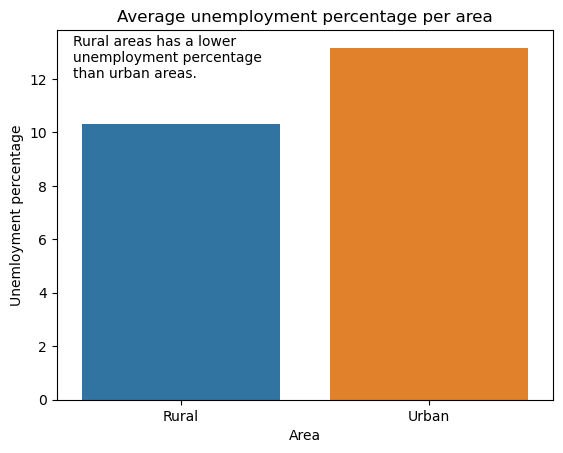

In [17]:
df1.rename(columns={' Area': 'Area'}, inplace=True)
sns.barplot(df1, x='Area', y=' Estimated Unemployment Rate (%)', errorbar=None)
plt.figtext(x= 0.15, y= 0.78 , s= 'Rural areas has a lower\nunemployment percentage\nthan urban areas.')
plt.title("Average unemployment percentage per area")
plt.ylabel('Unemloyment percentage')
plt.show()

Which state the crisis had affected mostly

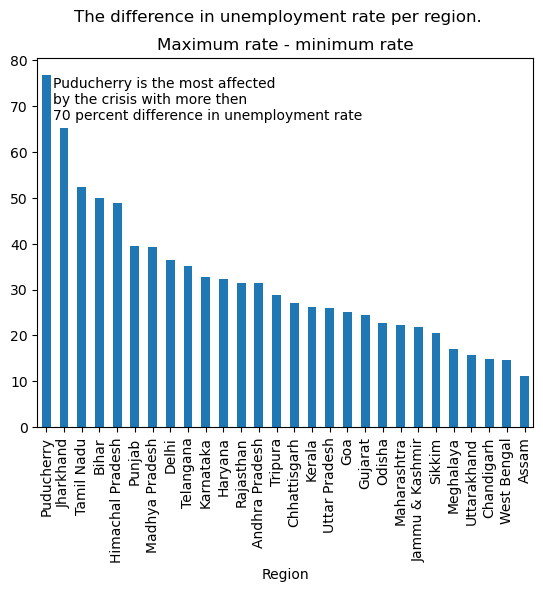

In [18]:
ax= df1.groupby('Region')[' Estimated Unemployment Rate (%)'].agg(lambda x: max(x) - min(x)).sort_values(ascending=False).plot(kind='bar')
plt.suptitle('The difference in unemployment rate per region.')
plt.title('Maximum rate - minimum rate')
plt.figtext(x= 0.15, y= 0.75, s='Puducherry is the most affected\nby the crisis with more then\n70 percent difference in unemployment rate ')
plt.show()